<a href="https://www.kaggle.com/code/kalianiketsingh/air-quality-index-ahemdabad-time-based-analysis?scriptVersionId=121607295" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Loading Modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [2]:
# Data Loading 

dd = pd.read_csv('../input/air-quality-data-in-india/city_day.csv')
dd.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
# Deal with Missing values

dd_col = ['NO', 'NO2', 'NOx', 'NH3', 'CO','SO2', 'O3']
print(dd.isnull().sum())
for i in dd_col:
    a = dd[i].mean()
    dd[i].replace(np.nan , a,inplace =  True)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [4]:
# Taking the data for city Ahmedabad
print(dd.isnull().sum())
Ahemdabad= dd.loc[dd['City'] == 'Ahmedabad']
Ahemdabad.head(10)
print(Ahemdabad.shape)
Ahemdabad['Date']= pd.to_datetime(Ahemdabad['Date']) 

City              0
Date              0
PM2.5          4598
PM10          11140
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
(2009, 16)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# Data preporcesssing
print(Ahemdabad.columns)
c =  ['City' , 'PM2.5' , 'PM10','Benzene' , 'Toluene', 'Xylene'  ,'AQI' ,'AQI_Bucket']

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [6]:
Ahemdabad.drop(c, axis=1, inplace=True)
Ahemdabad = Ahemdabad.sort_values('Date')


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
Ahemdabad.tail(10)

,Date,NO,NO2,NOx,NH3,CO,SO2,O3
1999,2020-06-22,4.48,16.76,11.49,23.483476,0.52,13.32,45.85
2000,2020-06-23,7.13,15.67,12.20,23.483476,0.51,13.00,64.75
2001,2020-06-24,13.07,25.92,21.72,23.483476,0.75,11.99,43.31
2002,2020-06-25,8.29,24.83,18.21,23.483476,0.65,11.73,40.54
2003,2020-06-26,8.96,30.78,20.80,23.483476,0.59,10.41,44.47
2004,2020-06-27,9.18,56.35,19.86,23.483476,0.49,12.44,68.05
2005,2020-06-28,6.37,23.99,16.40,23.483476,0.52,11.01,26.34
2006,2020-06-29,9.06,25.15,18.92,23.483476,0.67,12.10,34.99
2007,2020-06-30,7.09,58.92,33.41,23.483476,0.73,16.39,41.64
2008,2020-07-01,4.42,35.04,20.17,23.483476,0.28,14.40,9.69


In [8]:
# Weekly Data Analysis
Ahemdabad= Ahemdabad.reset_index()

Ahemdabad = Ahemdabad.set_index('Date')
Ahemdabad.index
Ahemdabad.tail(10)

,index,NO,NO2,NOx,NH3,CO,SO2,O3
Date,,,,,,,,
2020-06-22,1999,4.48,16.76,11.49,23.483476,0.52,13.32,45.85
2020-06-23,2000,7.13,15.67,12.20,23.483476,0.51,13.00,64.75
2020-06-24,2001,13.07,25.92,21.72,23.483476,0.75,11.99,43.31
2020-06-25,2002,8.29,24.83,18.21,23.483476,0.65,11.73,40.54
2020-06-26,2003,8.96,30.78,20.80,23.483476,0.59,10.41,44.47
2020-06-27,2004,9.18,56.35,19.86,23.483476,0.49,12.44,68.05
2020-06-28,2005,6.37,23.99,16.40,23.483476,0.52,11.01,26.34
2020-06-29,2006,9.06,25.15,18.92,23.483476,0.67,12.10,34.99
2020-06-30,2007,7.09,58.92,33.41,23.483476,0.73,16.39,41.64


In [9]:
# Considering the pollutant NO 
NO = Ahemdabad['NO'].resample('2W').mean()

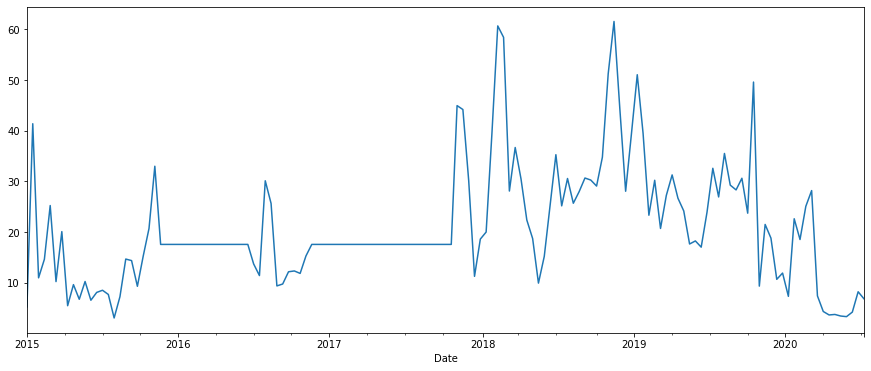

In [10]:
NO.plot(figsize=(15, 6))
plt.show()

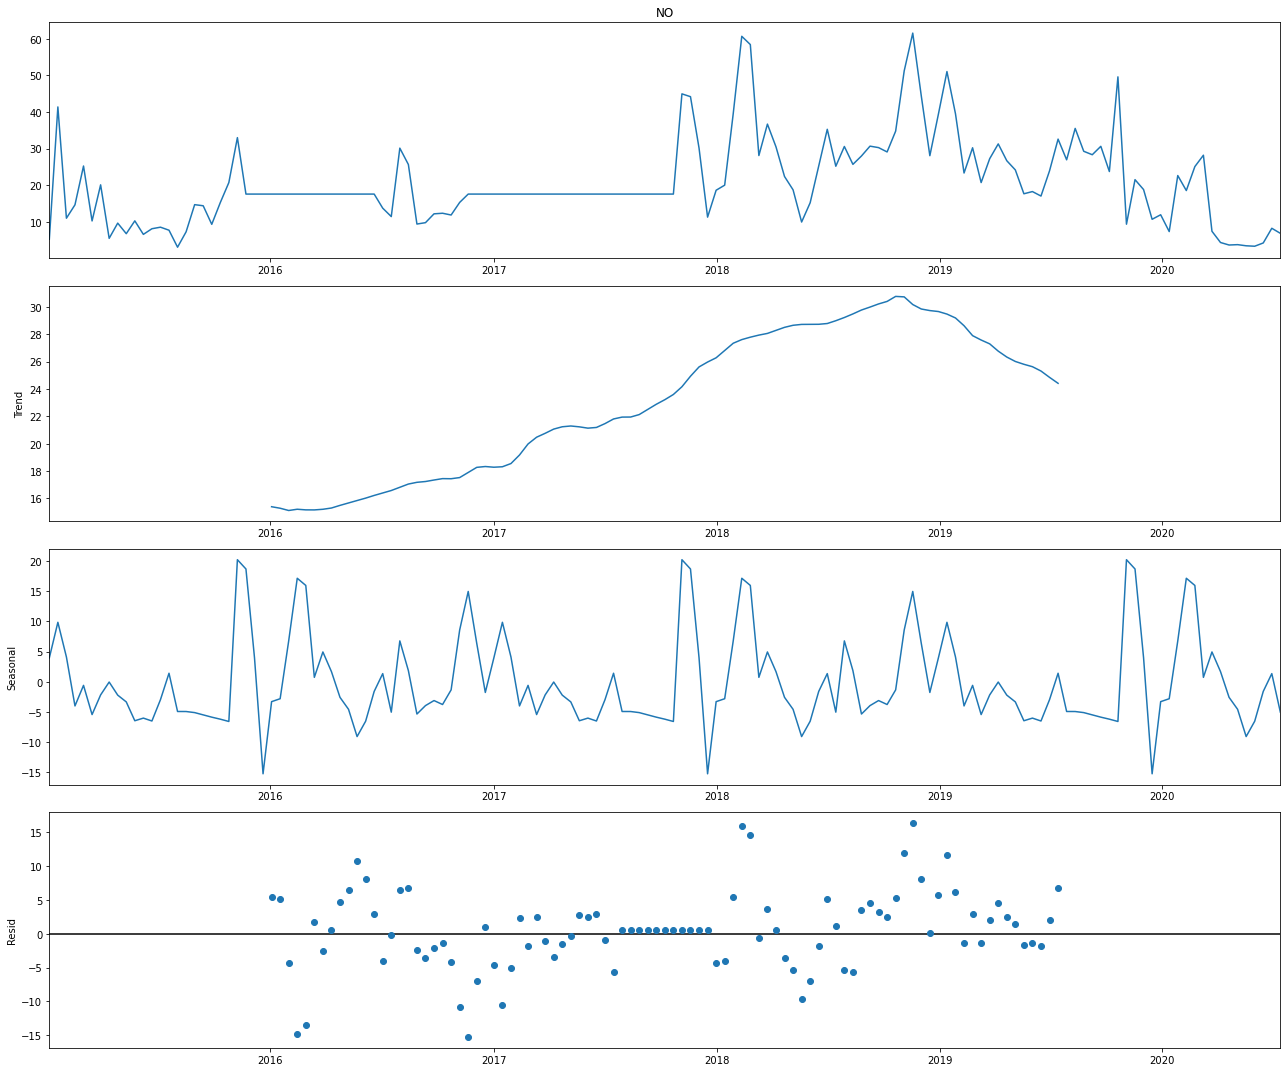

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15
decomposition = sm.tsa.seasonal_decompose(NO, model='additive')
fig1 = decomposition.plot()
plt.show()

In [12]:
# SAMIRA Model for NO
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(NO,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [14]:
mod = sm.tsa.statespace.SARIMAX(NO,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6144      0.091      6.734      0.000       0.436       0.793
ar.L2         -0.1816      0.082     -2.204      0.027      -0.343      -0.020
ma.L1         -0.8895      0.068    -13.120      0.000      -1.022      -0.757
ar.S.L12      -0.6496      0.071     -9.149      0.000      -0.789      -0.510
sigma2        86.2916      9.108      9.474      0.000      68.439     104.144


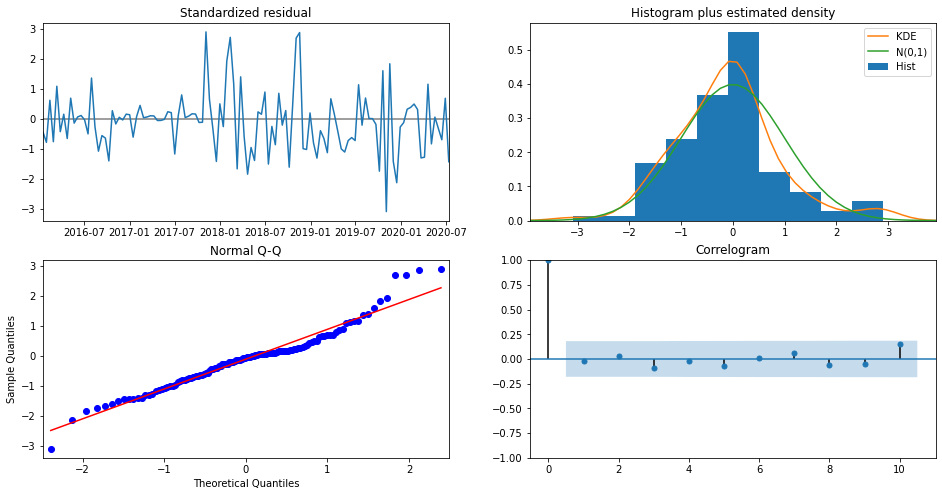

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

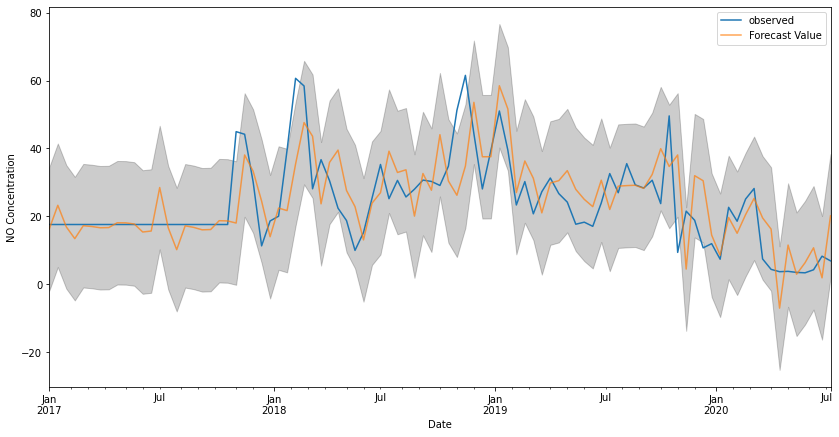

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = NO['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO Concentration')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = NO['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 99.97
The Root Mean Squared Error of our forecasts is 10.0


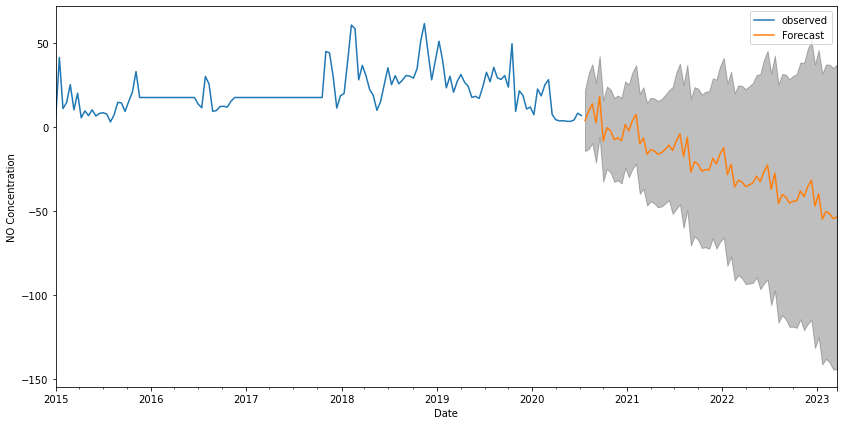

In [18]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = NO.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('NO Concentration')
plt.legend()
plt.show()

In [19]:
# Considering the pollutant SO2 
SO2 = Ahemdabad['SO2'].resample('2W').mean()

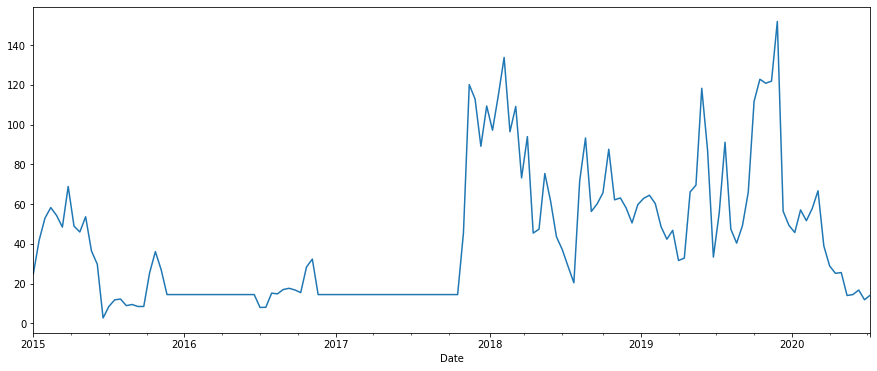

In [20]:
SO2.plot(figsize=(15, 6))
plt.show()

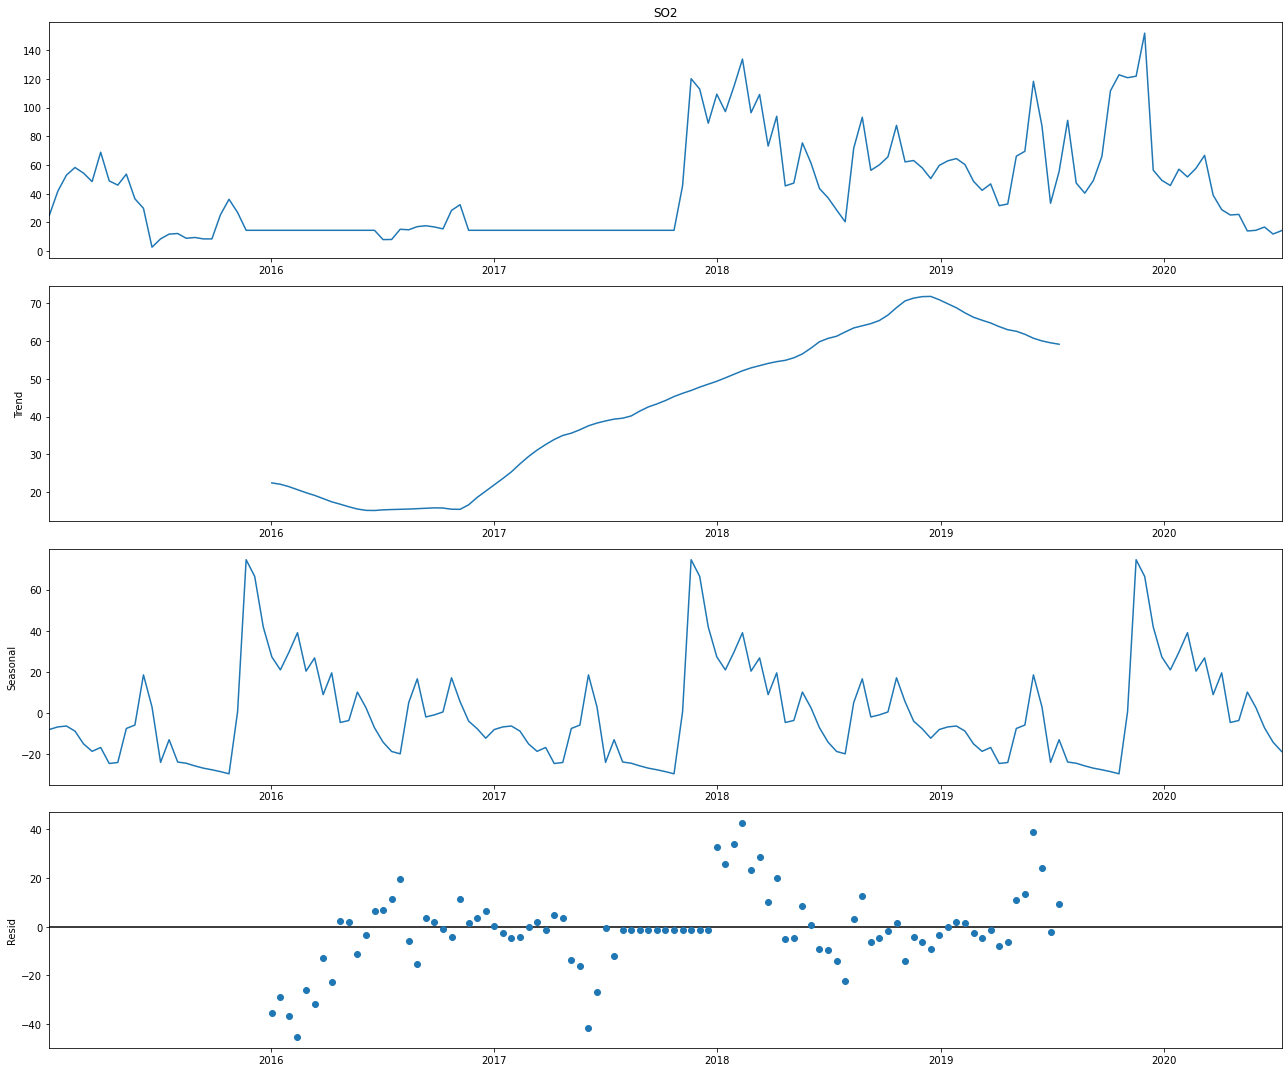

In [21]:
rcParams['figure.figsize'] = 18, 15
decomposition_so2 = sm.tsa.seasonal_decompose(SO2, model='additive')
fig_so2 = decomposition_so2.plot()
plt.show()

In [22]:
# SAMIRA Model for SO2
p = d = q = range(1, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 1, 3, 12)
SARIMAX: (1, 1, 3) x (1, 2, 1, 12)
SARIMAX: (1, 1, 3) x (1, 2, 2, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(SO2,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to

In [24]:
mod = sm.tsa.statespace.SARIMAX(SO2,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8557      0.091      9.366      0.000       0.677       1.035
ar.L2         -0.0621      0.092     -0.673      0.501      -0.243       0.119
ma.L1         -1.0000     90.030     -0.011      0.991    -177.455     175.455
ar.S.L12      -0.6160      0.075     -8.159      0.000      -0.764      -0.468
sigma2       499.0780   4.49e+04      0.011      0.991   -8.76e+04    8.86e+04


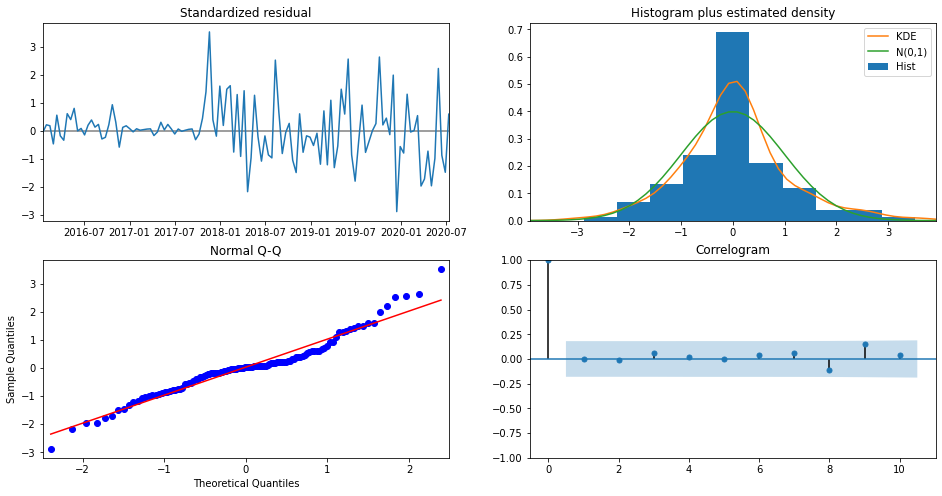

In [25]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

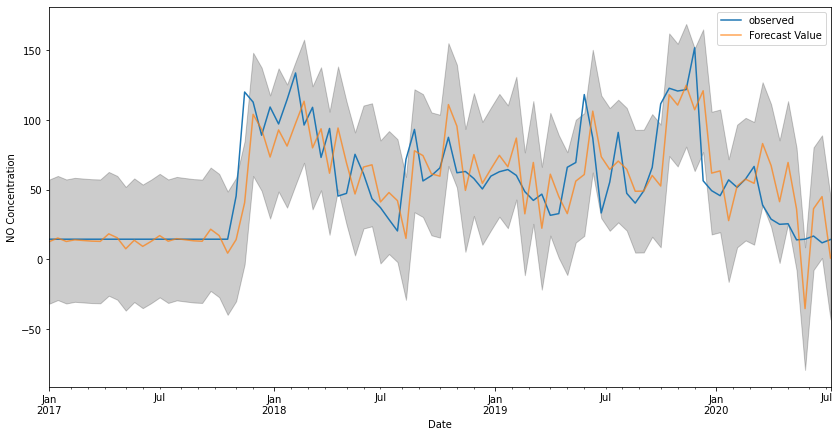

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = SO2['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO Concentration')
plt.legend()
plt.show()

In [27]:
y_forecasted = pred.predicted_mean
y_truth = SO2['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 618.73
The Root Mean Squared Error of our forecasts is 24.87


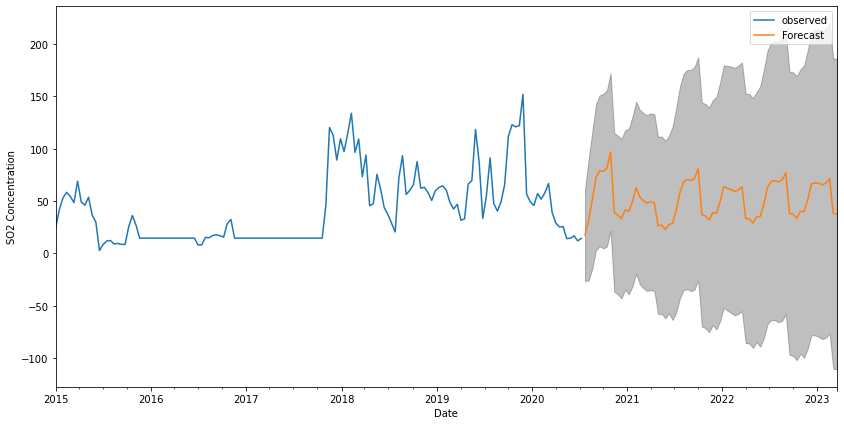

In [28]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = SO2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SO2 Concentration')
plt.legend()
plt.show()